In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

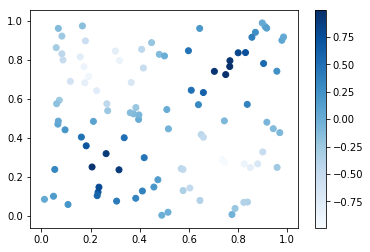

In [2]:
# 実測データの生成
x1 = np.random.rand(100)
x2 = np.random.rand(100)
y = np.sin(x1*2*np.pi)*np.sin(x2*2*np.pi)

plt.scatter(x1, x2, c=y, cmap='Blues')
plt.colorbar()
plt.show()

In [3]:
# ランダムフォレスト
k = 10  # 木の数
model = RandomForestRegressor(k)

x = np.c_[x1, x2]
model.fit(x, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [4]:
# 格子点生成
a = np.arange(0, 1, 0.01)
X, Y = np.meshgrid(a, a)
X = X.reshape(-1)
Y = Y.reshape(-1)
x_search = np.c_[X, Y]

y_predict = model.predict(x_search)

In [5]:
def display(top_n):
    z = y_predict.argsort()[-1::-1]
    Input = x_search[z[:top_n]]
    Output = y_predict[z[:top_n]]
    x_target_display = pd.DataFrame(Input)
    x_target_display['y_predict'] = Output
    return x_target_display

In [6]:
# 予測値の高い上位top_nを表示
top_n = 10
display(top_n)

,0,1,y_predict
0,0.75,0.73,0.949558
1,0.75,0.70,0.949558
2,0.75,0.71,0.949558
3,0.75,0.72,0.949558
4,0.75,0.69,0.949558
5,0.76,0.73,0.946805
6,0.76,0.70,0.946805
7,0.76,0.71,0.946805
8,0.76,0.72,0.946805
9,0.76,0.69,0.946805


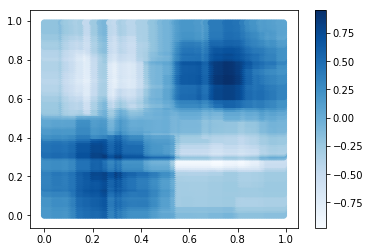

In [7]:
plt.scatter(X, Y, c=y_predict, cmap='Blues')
plt.colorbar()
plt.show()

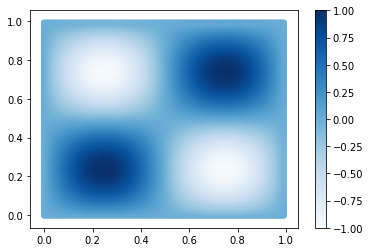

In [8]:
# 正解
y_real = np.sin(X*2*np.pi)*np.sin(Y*2*np.pi)
plt.scatter(X, Y, c=y_real, cmap='Blues')
plt.colorbar()
plt.show()